## Verilog Parser-v2

### Gate Netlist Parser

In [1]:
from pyparsing import *

In [3]:
with open('preprocessing/raw verilogs/CSkipA_8bit.rtlbb.v', 'rt') as fh:
    code = fh.read()

In [4]:
# add support for ground input '1'b0'
gnd = Literal("1'b0")

In [5]:
# add support for ground input '1'b0'
identifier = Word(alphas+"_", alphanums+"_"+'['+']') | gnd
input_port = Suppress("input") + delimitedList(identifier) + Suppress(";")
output_port = Suppress("output") + delimitedList(identifier) + Suppress(";")
# wire_list = Suppress("wire") + delimitedList(identifier) + Suppress(";")
# gate_type = oneOf("not and or nand nor xor")
port = Group(Suppress('.') + identifier + Suppress("(") + identifier + Suppress(")"))
gate = Group(identifier + identifier) + Suppress("(") + delimitedList(port) + Suppress(");")

# module_title = Suppress("module") + identifier + Suppress("(") + delimitedList(identifier) + Suppress(");")
# module = module_title + input_port + output_port + Optional(wire_list) + OneOrMore(gate) + Suppress("endmodule")

In [6]:
input_port_list = input_port.searchString(code)
output_port_list = output_port.searchString(code)
gate_list = gate.searchString(code)

In [7]:
len(output_port_list),len(input_port_list),len(gate_list)

(9, 16, 99)

### Standard Cell Library Parser

In [8]:
with open('/usr/local/share/qflow/tech/osu035/osu035_stdcells.v', 'rt') as fh:
    code_std_cells = fh.read()

In [9]:
module_title = Suppress("module") + identifier + Suppress("(") + delimitedList(identifier) + Suppress(");")

In [10]:
module_list = module_title.searchString(code_std_cells)

In [11]:
#Type of gates in the standard cell library
len(module_list)

35

In [12]:
gate_types={}
for i in range(len(module_list)):
#     print(module_list[i][0])
    gate_types[module_list[i][0]] = i+2

In [13]:
gate_types

{'AND2X1': 2,
 'AND2X2': 3,
 'AOI21X1': 4,
 'AOI22X1': 5,
 'BUFX2': 6,
 'BUFX4': 7,
 'CLKBUF1': 8,
 'CLKBUF2': 9,
 'CLKBUF3': 10,
 'DFFNEGX1': 11,
 'DFFPOSX1': 12,
 'DFFSR': 13,
 'FAX1': 14,
 'HAX1': 15,
 'INVX1': 16,
 'INVX2': 17,
 'INVX4': 18,
 'INVX8': 19,
 'LATCH': 20,
 'MUX2X1': 21,
 'NAND2X1': 22,
 'NAND3X1': 23,
 'NOR2X1': 24,
 'NOR3X1': 25,
 'OAI21X1': 26,
 'OAI22X1': 27,
 'OR2X1': 28,
 'OR2X2': 29,
 'PADINC': 30,
 'PADINOUT': 31,
 'PADOUT': 32,
 'TBUFX1': 33,
 'TBUFX2': 34,
 'XNOR2X1': 35,
 'XOR2X1': 36}

### Building Graph Components

In [14]:
gate_dict = {} #gate name mapped to unique integers
gate_type_dict = {}
#define gate types
#input_port = 0
#output_port = 1
#other gates start from 2
node_list = []
edge_list = []

In [15]:
#Add gnd pin at the beginning:
gate_dict["1'b0"] = 0
gate_type_dict[0] = 0
          
#Add input ports to gate_dict and gate_type_dict:
for idx,in_port in enumerate(input_port_list):
    gate_dict[in_port[0]] = idx+1
    gate_type_dict[idx+1] = 0
#     print(idx+1)

#Add gates to gate_dict: position[2] is output
for idx, a_gate in enumerate(gate_list):
#     gate_dict[a_gate[0][1]] = idx + len(input_port_list)
    gate_dict[a_gate[-1][1]] = idx + len(input_port_list) +1
    gate_type_dict[idx + len(input_port_list)+1] = gate_types[a_gate[0][0]]
#     print(idx + len(input_port_list)+1)

In [16]:
gate_dict,gate_type_dict

({"1'b0": 0,
  'i_add_term1[0]': 1,
  'i_add_term1[1]': 2,
  'i_add_term1[2]': 3,
  'i_add_term1[3]': 4,
  'i_add_term1[4]': 5,
  'i_add_term1[5]': 6,
  'i_add_term1[6]': 7,
  'i_add_term1[7]': 8,
  'i_add_term2[0]': 9,
  'i_add_term2[1]': 10,
  'i_add_term2[2]': 11,
  'i_add_term2[3]': 12,
  'i_add_term2[4]': 13,
  'i_add_term2[5]': 14,
  'i_add_term2[6]': 15,
  'i_add_term2[7]': 16,
  '_23_': 17,
  '_17_': 18,
  '_18_': 19,
  '_19_': 20,
  '_1__5_': 21,
  '_3__2_': 22,
  '_27_': 23,
  '_28_': 24,
  '_29_': 25,
  '_30_': 26,
  '_24_': 27,
  '_25_': 28,
  '_26_': 29,
  '_1__6_': 30,
  '_3__3_': 31,
  '_34_': 32,
  '_35_': 33,
  '_36_': 34,
  '_37_': 35,
  '_31_': 36,
  '_32_': 37,
  '_33_': 38,
  '_1__7_': 39,
  '_2_': 40,
  '_41_': 41,
  '_42_': 42,
  '_43_': 43,
  '_44_': 44,
  '_38_': 45,
  '_39_': 46,
  '_40_': 47,
  '_1__0_': 48,
  'rca_inst_w_CARRY_1_': 49,
  '_48_': 50,
  '_49_': 51,
  '_50_': 52,
  '_51_': 53,
  '_45_': 54,
  '_46_': 55,
  '_47_': 56,
  '_1__1_': 57,
  'rca_ins

In [17]:
#Add input ports and gates to node_list:
for idx in range(len(gate_dict)):
    node_list.append(idx) 
    
#Add connections to edge_list:
for a_gate in gate_list:
#     print(a_gate[1])
    for connection in a_gate[1:-1]:
#         print(connection)
        edge_list.append((gate_dict[connection[1]],gate_dict[a_gate[-1][1]]))
    
existing_length = len(node_list)

#Add output ports to node_list:
for idx,out_port in enumerate(output_port_list):
    gate_type_dict[idx+existing_length] = 1 #gate type is output port
    node_list.append(idx+existing_length)
    edge_list.append((gate_dict[out_port[0]],idx+existing_length))                    
        

In [18]:
len(node_list),len(edge_list)

(125, 214)

### Build DGL Graph From the Components

In [19]:
import dgl

In [20]:
def build_circuit_graph_undirected():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

In [21]:
G_directed_sd = build_circuit_graph_directed_sd()
print('We have %d nodes.' % G_directed_sd.number_of_nodes())
print('We have %d edges.' % G_directed_sd.number_of_edges())

We have 125 nodes.
We have 214 edges.


In [22]:
G_undirected = build_circuit_graph_undirected()
print('We have %d nodes.' % G_undirected.number_of_nodes())
print('We have %d edges.' % G_undirected.number_of_edges())

We have 125 nodes.
We have 428 edges.


### Visualize Circuit Graph

In [23]:
node_type = [gate_type_dict[n] for n in node_list]

In [24]:
gate_types2 = dict([(value, key) for key, value in gate_types.items()]) 

In [25]:
gate_types2[0] = 'Input'
gate_types2[1] = 'Output'

In [26]:
gate_type_dict2 = dict([(key, gate_types2[value]) for key, value in gate_type_dict.items()]) 

### Directed Graph

In [27]:
%matplotlib inline

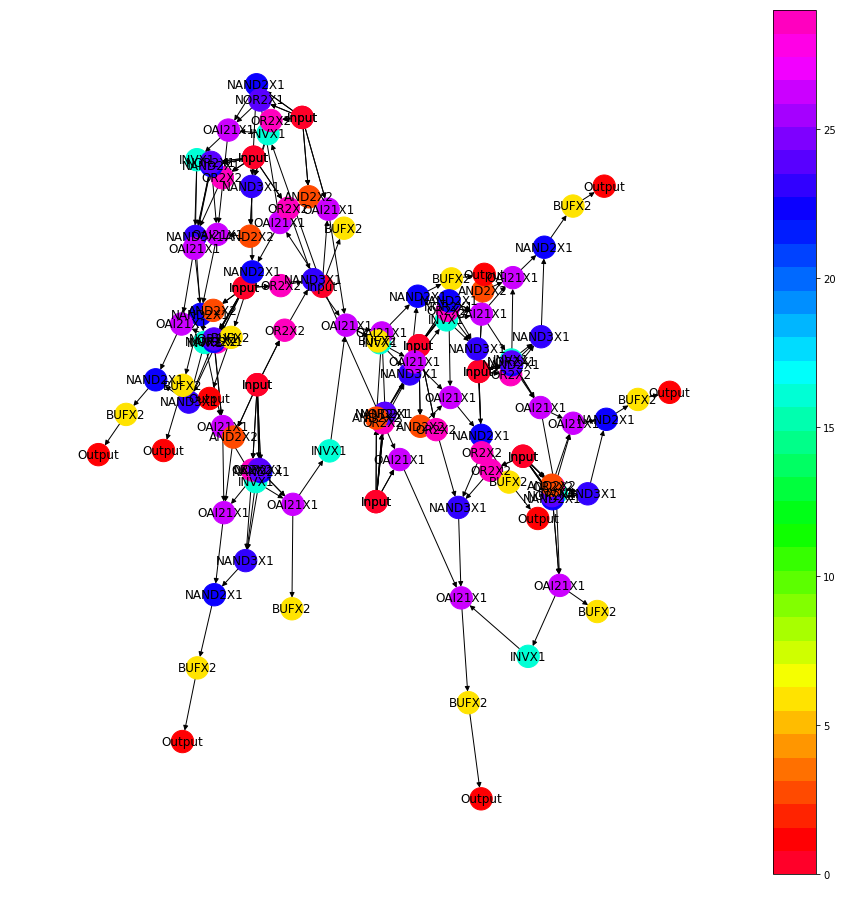

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
nx_G_directed_sd = G_directed_sd.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G_directed_sd)
plt.figure(1,figsize=(12,12))
cmap = plt.get_cmap('gist_rainbow',len(gate_types)+2)
# cmap.set_under('gray')
vmin = min(node_type)
vmax = max(node_type)
nx.draw(nx_G_directed_sd,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
# plt.savefig('c432_undirected.png')
nx.draw_networkx_labels(nx_G_directed_sd,pos,labels=gate_type_dict2)
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
cm._A = []
plt.colorbar(cm)

### Undirected Graph

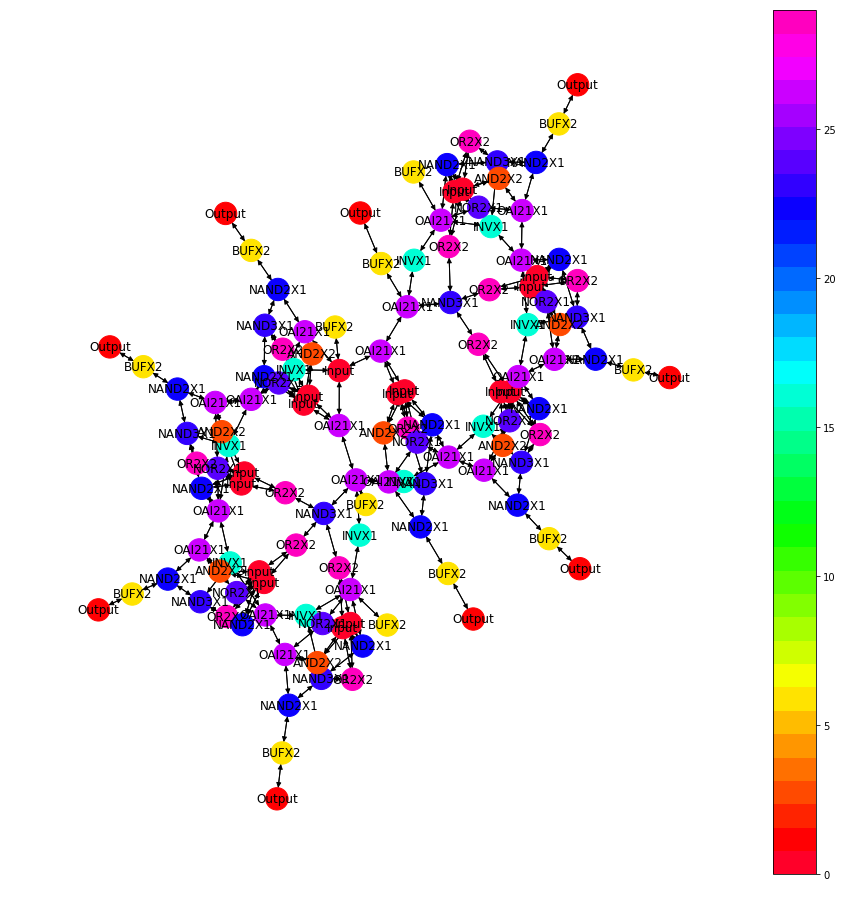

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
nx_G_undirected = G_undirected.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G_undirected)
plt.figure(1,figsize=(12,12))
cmap = plt.get_cmap('gist_rainbow',len(gate_types)+2)
# cmap.set_under('gray')
vmin = min(node_type)
vmax = max(node_type)
nx.draw(nx_G_undirected,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
# plt.savefig('c432_undirected.png')
nx.draw_networkx_labels(nx_G_undirected,pos,labels=gate_type_dict2)
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
cm._A = []
plt.colorbar(cm)

## End